# Finance Regression: Mini Project

In this project, you will use regression to predict financial data for Enron employees and associates. Once you know some financial data about an employee, like their salary, 
### what would you predict for the size of their bonus?



## Bonus Target and features

Run the starter code found in **regression/finance_regression.py.** This will draw a scatterplot, with all the data points drawn in. 

##### What target are you trying to predict? What is the input feature being used to predict it?

Mentally (or better yet, print out the scatterplot and use paper and pencil) sketch out the regression line that you roughly predict.

## Visualizing Regression Data

In regression, you need training and testing data, just like in classification. This has already been set up in the starter code. Change the value of test_color from "b" to “r” (for “red”), and rerun. Note: For those students converting Python 2 code to Python 3, see below for some important remarks regarding compatibility.

You will be fitting your regression using the blue (training) points only. (You may have noticed that instead of the standard 10%, we’ve put 50% of our data into the test set--that’s because in Part 5, we will switch the training and testing datasets around and splitting the data evenly makes this more straightforward.)

From Python 3.3 forward, a change to the order in which dictionary keys are processed was made such that the orders are randomized each time the code is run. This will cause some compatibility problems with the graders and project code, which were run under Python 2.7. To correct for this, add the following argument to the featureFormat call on line 26 of finance_regression.py:

sort_keys = '../tools/python2_lesson06_keys.pkl'

This will open up a file in the tools folder with the Python 2 key order.

## Extracting Slope and Intercept

Import LinearRegression from sklearn, and create/fit your regression. Name it reg so that the plotting code will show it overlaid on the scatterplot. Does it fall approximately where you expected it?

Extract the slope (stored in the reg.coef_ attribute) and the intercept. 

### What are the slope and intercept?

Note: If you are not getting the results expected by the grader, then you may want to check the file `tools/feature_format.py`. Due to changes in the final project, some file changes have affected the numbers output on this assignment as written. Check that you have the most recent version of the file from the repository, such that the `featureFormat` has a default parameter for `sort_keys = False` and that `keys = dictionary.keys()` results. There should also be a `test_list` variable that is used to filter missing data.

Starter code for the regression mini-project.

Loads up/formats a modified version of the dataset
(why modified?  we've removed some trouble points
that you'll find yourself in the outliers mini-project).

Draws a little scatterplot of the training/testing data

You fill in the regression code where indicated:    

## Importing Libraries

In [1]:
%matplotlib inline
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

def Regression():
    train_color = "b"
    test_color = "r"


    ### Your regression goes here!
    ### Please name it reg, so that the plotting code below picks it up and 
    ### plots it correctly. Don't forget to change the test_color above from "b" to
    ### "r" to differentiate training points from test points.
    reg = LinearRegression().fit(feature_train, target_train)


    ### draw the scatterplot, with color-coded training and testing points
    for feature, target in zip(feature_test, target_test):
        plt.scatter( feature, target, color=test_color ) 
    for feature, target in zip(feature_train, target_train):
        plt.scatter( feature, target, color=train_color ) 

    ### labels for the legend
    plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
    plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




    ### draw the regression line, once it's coded
    try:
        plt.plot( feature_test, reg.predict(feature_test) )
    except NameError:
        pass
    plt.xlabel(features_list[1])
    plt.ylabel(features_list[0])
    plt.legend()
    plt.show()
    
    return reg


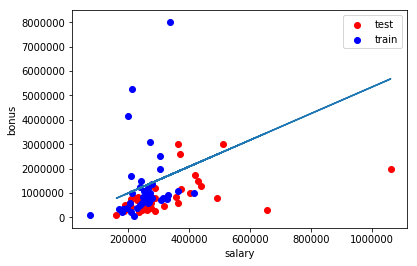

In [7]:
reg = Regression()

In [8]:
print("Slope of the line: {}".format(reg.coef_))
print("Intercept of the line: {}".format(reg.intercept_))

Slope of the line: [5.44814029]
Intercept of the line: -102360.543294


## Regression Score: Training Data

Imagine you were a less savvy machine learner, and didn’t know to test on a holdout test set. Instead, you tested on the same data that you used to train, by comparing the regression predictions to the target values (i.e. bonuses) in the training data. `What score do you find?` You may not have an intuition yet for what a “good” score is; this score isn’t very good (but it could be a lot worse).

In [9]:
print("Score of the Regressor on the Training Data: {}".format(reg.score(feature_train, target_train)))

Accuracy of the Regressor on the Training Data: 0.0455091926995


## Regression Score: Test Data

Now compute the score for your regression on the test data, like you know you should. What’s that score on the testing data? If you made the mistake of only assessing on the training data, would you overestimate or underestimate the performance of your regression?

In [10]:
print("Score of the Regressor on the Test Data: {}".format(reg.score(feature_test, target_test)))

Accuracy of the Regressor on the Test Data: -1.48499241737


## Regression Bonus against LTI

There are lots of finance features available, some of which might be more powerful than others in terms of predicting a person’s bonus. For example, suppose you thought about the data a bit and guess that the “long_term_incentive” feature, which is supposed to reward employees for contributing to the long-term health of the company, might be more closely related to a person’s bonus than their salary is.

A way to confirm that you’re right in this hypothesis is to regress the bonus against the long term incentive, and see if the regression score is significantly higher than regressing the bonus against the salary. 
##### Perform the regression of bonus against long term incentive--what’s the score on the test data?

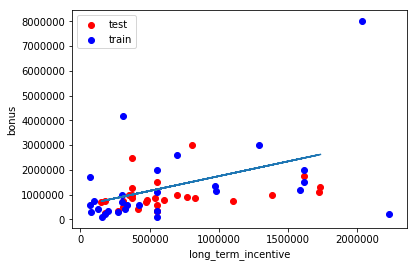

In [11]:
features_list = ["bonus", "long_term_incentive"]

data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

reg = Regression()

In [12]:
print("Regression Score: {}".format(reg.score(feature_test, target_test)))

Regression Score: -0.59271289995


## Salary VS LTI for Predicting Bonus

If you had to predict someone’s bonus and you could only have one piece of information about them, **would you rather know their salary or the long term incentive that they received?**

- Salary
- Long Term Incentives

Answer: Long Term Incentives

## Sneak Peek: Outliers Break Regressions

This is a sneak peek of the next lesson, on outlier identification and removal.**Go back to a setup where you are using the salary to predict the bonus, and rerun the code to remind yourself of what the data look like**. You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier, and we’ll spend lots of time on them in the next lesson.

A point like this can have a big effect on a regression: if it falls in the training set, it can have a significant effect on the slope/intercept if it falls in the test set, it can make the score much lower than it would otherwise be As things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result). Let’s add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom of finance_regression.py, right before plt.xlabel(features_list[1]):

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 

Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. **What’s the slope of the new regression line?**

(That’s a big difference, and it’s mostly driven by the outliers. The next lesson will dig into outliers in more detail so you have tools to detect and deal with them.)

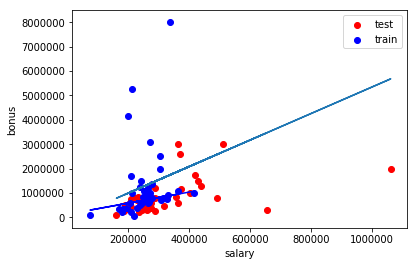

In [18]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

def Regression():
    train_color = "b"
    test_color = "r"


    ### Your regression goes here!
    ### Please name it reg, so that the plotting code below picks it up and 
    ### plots it correctly. Don't forget to change the test_color above from "b" to
    ### "r" to differentiate training points from test points.
    reg = LinearRegression().fit(feature_train, target_train)


    ### draw the scatterplot, with color-coded training and testing points
    for feature, target in zip(feature_test, target_test):
        plt.scatter( feature, target, color=test_color ) 
    for feature, target in zip(feature_train, target_train):
        plt.scatter( feature, target, color=train_color ) 

    ### labels for the legend
    plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
    plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




    ### draw the regression line, once it's coded
    try:
        plt.plot( feature_test, reg.predict(feature_test) )
    except NameError:
        pass
    
    # Added this line.     
    reg.fit(feature_test, target_test) 
    plt.plot(feature_train, reg.predict(feature_train), color="b")
    
    plt.xlabel(features_list[1])
    plt.ylabel(features_list[0])
    plt.legend()
    plt.show()
    
    return reg

reg = Regression()

In [19]:
print("Slope of the line: {}".format(reg.coef_))

Slope of the line: [2.27410114]
